In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
pd.set_option('display.max_columns', 30)

dados = load_breast_cancer()
x = pd.DataFrame(dados.data, columns = [dados.feature_names])
y = pd.Series(dados.target)

In [2]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separando os dados entre treino e teste:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size = 0.3, random_state = 9)

modelo = LogisticRegression(solver='liblinear', C = 95, penalty = 'l1')
modelo.fit(X_treino, Y_treino)

resultado = modelo.score(X_teste, Y_teste)
print(resultado)

0.9766081871345029


In [4]:
predicoes = modelo.predict_proba(X_teste)

In [5]:
probs = predicoes[:, 1]

In [6]:
from sklearn.metrics import roc_curve
fpr, tpr, threshholds = roc_curve(Y_teste, probs)

print('TPR:', tpr)
print('FPR:', fpr)
print('Threshholds:', threshholds)

TPR: [0.         0.00917431 0.94495413 0.94495413 0.98165138 0.98165138
 0.99082569 0.99082569 1.         1.        ]
FPR: [0.         0.         0.         0.03225806 0.03225806 0.0483871
 0.0483871  0.11290323 0.11290323 1.        ]
Threshholds: [2.00000000e+00 9.99999997e-01 8.94125678e-01 8.75729552e-01
 7.02206382e-01 6.54574304e-01 6.16361813e-01 1.73563191e-01
 1.25588820e-01 2.10353731e-50]


##### Onde
$FPR = \frac{FP} {FP + TN}$

$TPR = \frac{TP} {TP + FN}$

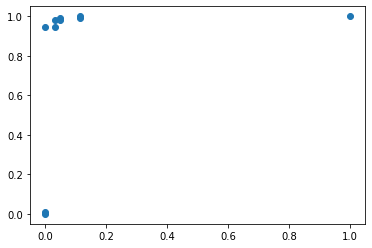

In [7]:
import matplotlib.pyplot as plt

plt.scatter(fpr, tpr)
plt.show()

In [8]:
from sklearn.metrics import roc_auc_score

# Score em relação à área da curva
print(roc_auc_score(Y_teste, probs))

0.9973364900858241
